In [ ]:
import torch, os
from google.colab import drive
drive.mount('/content/drive')
if os.getcwd() != "/content/drive/My Drive/TRSA":
  os.chdir("drive/MyDrive/TRSA")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers datasets
!pip install transformers

     |████████████████████████████████| 4.0 MB 8.1 MB/s 
     |████████████████████████████████| 325 kB 71.1 MB/s 
     |████████████████████████████████| 6.6 MB 55.8 MB/s 
     |████████████████████████████████| 596 kB 68.6 MB/s 
     |████████████████████████████████| 77 kB 5.1 MB/s 
     |████████████████████████████████| 895 kB 62.9 MB/s 
     |████████████████████████████████| 212 kB 68.7 MB/s 
     |████████████████████████████████| 1.1 MB 50.5 MB/s 
     |████████████████████████████████| 136 kB 55.8 MB/s 
     |████████████████████████████████| 127 kB 68.0 MB/s 
     |████████████████████████████████| 271 kB 53.6 MB/s 
     |████████████████████████████████| 144 kB 63.3 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling

In [ ]:
import pandas as pd
data= pd.read_csv("TRSAv1.csv",encoding="utf8")
#data=data.sample(frac=1)
data

,id,score,review
0,0,Positive,Kokusu çok güzel etkisi de efsane
1,1,Negative,hiç bir fark olmadı siyah nokta silmedi
2,2,Positive,şeffaf güzel bir krem elimi yumuşacık yaptı
3,3,Positive,Özellikle karma ve hassas cildiniz varsa La Ro...
4,4,Negative,çok iyi nemlendiriyor ama daha ucuz muadilleri...
...,...,...,...
149995,149995,Neutral,Suruldugunde hafif bir parlaklik veriyor. Yika...
149996,149996,Positive,Mükemmel nemlendirici hayraniyim bu nemlendiri...
149997,149997,Positive,Çok güzel fiyatı da gayet uygun
149998,149998,Neutral,Fiyat olarak iyi ama düzenli kullansamda geçir...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data["score"].value_counts()

Positive    50000
Negative    50000
Neutral     50000
Name: score, dtype: int64

In [ ]:
data

,id,score,review
0,0,Positive,Kokusu çok güzel etkisi de efsane
1,1,Negative,hiç bir fark olmadı siyah nokta silmedi
2,2,Positive,şeffaf güzel bir krem elimi yumuşacık yaptı
3,3,Positive,Özellikle karma ve hassas cildiniz varsa La Ro...
4,4,Negative,çok iyi nemlendiriyor ama daha ucuz muadilleri...
...,...,...,...
149995,149995,Neutral,Suruldugunde hafif bir parlaklik veriyor. Yika...
149996,149996,Positive,Mükemmel nemlendirici hayraniyim bu nemlendiri...
149997,149997,Positive,Çok güzel fiyatı da gayet uygun
149998,149998,Neutral,Fiyat olarak iyi ama düzenli kullansamda geçir...


In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

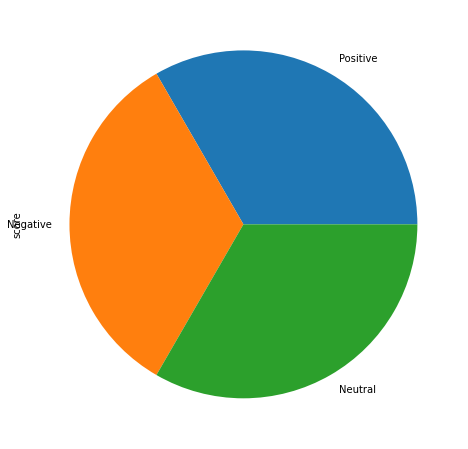

In [ ]:
data.score.value_counts().plot(kind='pie', figsize=(8,8))


In [ ]:
data["score"].value_counts()

Positive    50000
Negative    50000
Neutral     50000
Name: score, dtype: int64

In [ ]:
labels=["Negative","Neutral","Positive"]
NUM_LABELS= len(labels)
id2label={i:l for i,l in enumerate(labels)}
label2id={l:i for i,l in enumerate(labels)}

In [ ]:
label2id

{'Negative': 0, 'Neutral': 1, 'Positive': 2}

In [ ]:
data

,id,score,review
0,0,2,Kokusu çok güzel etkisi de efsane
1,1,0,hiç bir fark olmadı siyah nokta silmedi
2,2,2,şeffaf güzel bir krem elimi yumuşacık yaptı
3,3,2,Özellikle karma ve hassas cildiniz varsa La Ro...
4,4,0,çok iyi nemlendiriyor ama daha ucuz muadilleri...
...,...,...,...
149995,149995,1,Suruldugunde hafif bir parlaklik veriyor. Yika...
149996,149996,2,Mükemmel nemlendirici hayraniyim bu nemlendiri...
149997,149997,2,Çok güzel fiyatı da gayet uygun
149998,149998,1,Fiyat olarak iyi ama düzenli kullansamda geçir...


In [ ]:

data["score"]=data.score.map(lambda x:label2id[x.strip()])


AttributeError: ignored

In [ ]:
model_path="TR15"

In [ ]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained(model_path, max_length=100)

In [ ]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)
model.to(device)

Some weights of the model checkpoint at TR15 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at TR15 and are newly initialized: ['classi

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
SIZE= data.shape[0]

train_texts= list(data.review[:SIZE//2])
val_texts=   list(data.review[SIZE//2:(3*SIZE)//4 ])
test_texts=  list(data.review[(3*SIZE)//4:])

train_labels= list(data.score[:SIZE//2])
val_labels=   list(data.score[SIZE//2:(3*SIZE)//4])
test_labels=  list(data.score[(3*SIZE)//4:])

In [ ]:
len(train_texts), len(val_texts), len(test_texts)


(75000, 37500, 37500)

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = MyDataset(train_encodings, train_labels)
val_dataset = MyDataset(val_encodings, val_labels)
test_dataset = MyDataset(test_encodings, test_labels)

In [ ]:
from transformers import TrainingArguments, Trainer


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support 
def compute_metrics(pred): 
    labels = pred.label_ids 
    preds = pred.predictions.argmax(-1) 
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro') 
    acc = accuracy_score(labels, preds) 
    return { 
        'Accuracy': acc, 
        'F1': f1, 
        'Precision': precision, 
        'Recall': recall 
    }

In [ ]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='./KitapModel', 
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0 
    num_train_epochs=3,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory                 
    logging_dir='./multi-class-logs',            
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps", 
    fp16=True,
    load_best_model_at_end=True
)

In [ ]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned 
    model=model,
     # training arguments that we defined above                        
    args=training_args,                 
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
    compute_metrics= compute_metrics
)

Using amp half precision backend


In [ ]:
trainer.train()


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,0.894600,0.563861,0.761040,0.746907,0.763470,0.761724


KeyboardInterrupt: ignored

In [ ]:
q=[trainer.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

In [ ]:
device = 'cuda'
import torch, gc
import os
gc.collect()
torch.cuda.empty_cache()

In [ ]:
!pip install GPUtil

import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()       

  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=76329a4fddb49f9afa1bddda467889ba5abec596395ed0430b066ea78f62813b
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil
Initial GPU Usage
| ID | GPU | MEM  |
-------------------
|  0 |  0% | 100% |
GPU Usage after emptying the cache
| ID | GPU  | MEM |
-------------------
|  0 | 100% |  1% |


In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()
cuda.select_device(0)

<weakproxy at 0x7f52220e7410 to Device at 0x7f521601b550>